In [ ]:
# Import essential libraries
import pandas as pd  # For data manipulation
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For visualization
import seaborn as sns  # For advanced visualizations

# Scikit-Learn for machine learning
from sklearn.model_selection import train_test_split  # Splitting dataset
from sklearn.preprocessing import LabelEncoder, StandardScaler  # Encoding & Scaling
from sklearn.ensemble import RandomForestClassifier  # Classification model
from sklearn.linear_model import LogisticRegression  # Another classification model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # Model evaluation


In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv("cancer patient data sets.csv")

# Display basic information about the dataset
print("Dataset Information:")
print(df.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Ches

In [5]:
print("Missing Values:")
print(df.isnull().sum())


Missing Values:
index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64


In [7]:
print("first 5 rows")

print(df.head())

first 5 rows
   index Patient Id  Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0      0         P1   33       1              2            4             5   
1      1        P10   17       1              3            1             5   
2      2       P100   35       1              4            5             6   
3      3      P1000   37       1              7            7             7   
4      4       P101   46       1              6            8             7   

   OccuPational Hazards  Genetic Risk  chronic Lung Disease  ...  Fatigue  \
0                     4             3                     2  ...        3   
1                     3             4                     2  ...        1   
2                     5             5                     4  ...        8   
3                     7             6                     7  ...        4   
4                     7             7                     6  ...        3   

   Weight Loss  Shortness of Breath  Wheezing  Swallowi

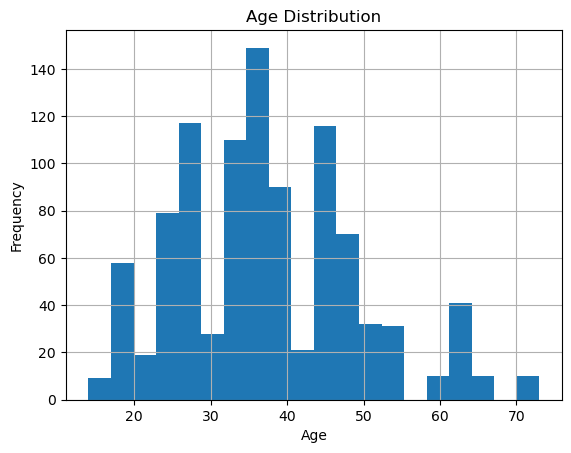

In [9]:
import matplotlib.pyplot as plt
df['Age'].hist(bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


In [43]:
# Print all column names to check the correct one
print(df.columns)


Index(['index', 'Patient Id', 'Age', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Chest Pain',
       'Coughing of Blood', 'Fatigue', 'Weight Loss', 'Shortness of Breath',
       'Wheezing', 'Swallowing Difficulty', 'Clubbing of Finger Nails',
       'Frequent Cold', 'Dry Cough', 'Snoring', 'Level', 'Gender_2',
       'Smoking_2', 'Smoking_3', 'Smoking_4', 'Smoking_5', 'Smoking_6',
       'Smoking_7', 'Smoking_8', 'Passive Smoker_2', 'Passive Smoker_3',
       'Passive Smoker_4', 'Passive Smoker_5', 'Passive Smoker_6',
       'Passive Smoker_7', 'Passive Smoker_8'],
      dtype='object')


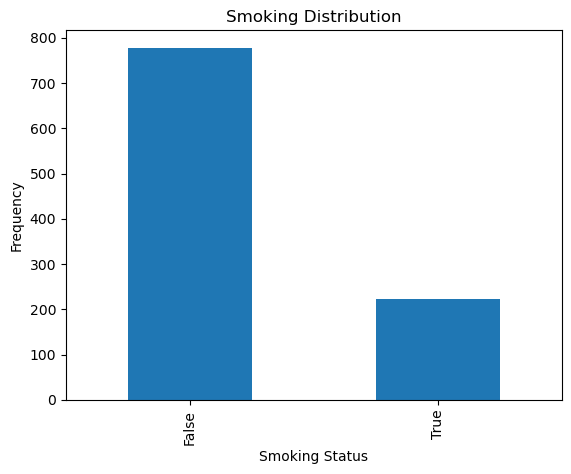

In [45]:
# Plot the distribution of the correct 'Smoking' column
df['Smoking_2'].value_counts().plot(kind='bar')
plt.title('Smoking Distribution')
plt.xlabel('Smoking Status')
plt.ylabel('Frequency')
plt.show()


In [69]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming df is your DataFrame and 'Level' is your target column
X = df.drop(['Level', 'index', 'Patient Id'], axis=1)  # Drop non-feature columns
y = df['Level']  # Target column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy score on the test set
best_accuracy = accuracy_score(y_test, y_pred)

# Print the best accuracy as a percentage
print("Best Accuracy: {:.2f}%".format(best_accuracy * 100))


Best Accuracy: 100.00%


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset (make sure the path is correct and the file exists)
df = pd.read_csv("cancer patient data sets.csv")

# Choosing features and the target variable
X = df[['Alcohol use', 'Dust Allergy', 'Air Pollution', 'Smoking', 'Obesity', 'OccuPational Hazards', 'Genetic Risk', 'Fatigue', 'chronic Lung Disease']]
y = df['Level']

# Splitting the dataset into train and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an SVM model
svm = SVC()
svm.fit(X_train, y_train)

# Make predictions
svm_pred = svm.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, svm_pred)

# Define a function to plot the confusion matrix
def plot_confusion_matrix(cm, col_names, title, cmap):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=col_names, yticklabels=col_names)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Plot the confusion matrix
plot_confusion_matrix(cm, col_names=['Low', 'Medium', 'High'], title='- SVM', cmap='Blues')

# Store the accuracy score for the SVM model
ml_accuracies = {}
ml_accuracies['SVM'] = accuracy_score(y_test, svm_pred)

# Print the classification report
print(classification_report(y_test, svm_pred))
